In [7]:
import numpy as np
import skimage
import cv2
import json
%matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
import os

In [8]:
directory_contents = os.listdir('data/train')
directory_contents

['train-1-5',
 '.DS_Store',
 'train-1-2',
 'train-1-14',
 'train-1-13',
 'train-1-3',
 'train-1-4',
 'train-1-12',
 'train-1-15',
 'train-2-5',
 'train-2-2',
 'train-2-3',
 'train-2-4',
 'train-1-10',
 'train-1-8',
 'train-1-1',
 'train-1-6',
 'train-1-11',
 'train-1-7',
 'train-1-0',
 'train-1-9',
 'train-2-8',
 'train-2-1',
 'train-2-6',
 'train-2-7',
 'train-2-0',
 'train-2-9']

In [9]:
def do_it_for_a_folder(n, fname): 
    
    try:
        os.rmdir('data/train_ready/%s/'%fname)
    except OSError:
        print ("Deletion of the directory failed")
    else:
        print ("Successfully deleted the directory")

    try:
        os.mkdir('data/train_ready/%s/'%fname)
    except OSError:
        print ("Creation of the directory failed")
    else:
        print ("Successfully created the directory")


    # get homographies:
    path = 'data/train/%s/'%fname
    with open(path + 'homographies.json') as f:
        homography = json.load(f)


    # camera names
    cameras = ['B05', 'B04', 'B03', 'B02', 'B01', \
               'G01', 'G02', 'G03', 'G04', 'G05']

    #get 1st frames of each camera
    images = {}
    for i in range(10):
        images[i] = cv2.imread(path + '%d-%s.png'%(n, cameras[i]))


    # getting rid of the timestamp
    mask = cv2.imread('data/mask.png')
    mask = mask.astype(bool)

    for i in range(10):
        images[i] = images[i] * mask


    def warp(image, camera_name):
        h = np.asarray(homography['%d-'%n + camera_name])
        image_warped = cv2.warpPerspective(image, 
                                           h, 
                                           image.shape[:2])
        p1 = [0, 0, 1]
        c1 = h.dot(p1)[:-1]
        p2 = [image.shape[0], 0, 1]
        c2 = h.dot(p2)[:-1]
        p3 = [image.shape[0], image.shape[1], 1]
        c3 = h.dot(p3)[:-1]
        p4 = [0, image.shape[1], 1]
        c4 = h.dot(p4)[:-1]

        img = np.zeros((image.shape[0], 
                        image.shape[1], 
                        image.shape[2]), 
                       dtype = "uint8")
        corners = np.array([[c1, c2, c3, c4]], 
                           np.int32)
        polylines2 = cv2.polylines(img, [corners], True, 
                                   (255,120,255),3)
        polygon = cv2.fillPoly(polylines2, corners, (255,255,255))

        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray = cv2.medianBlur(gray,3)
        ret,thresh = cv2.threshold(gray,1,255,0)
        contours,hierarchy = cv2.findContours(thresh,
                                              cv2.RETR_LIST,
                                              cv2.CHAIN_APPROX_SIMPLE)

        max_area = -1
        best_cnt = None

        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area > max_area:
                max_area = area
                best_cnt = cnt
        contour = cv2.drawContours(image, 
                                     [best_cnt], 
                                     -1, 
                                     (255, 255, 255), 
                                     -1, 
                                     cv2.LINE_AA)
        contour = cv2.warpPerspective(contour, 
                                           h, 
                                           image.shape[:2])
        return image_warped, contour#, polygon
                # image_warped: warped image, 
                # best_cnt: image without black areas, 
                # polygon: leftout area after warping

    # 1st image
    image = images[0]
    camera = cameras[0]
    i0, c0 = warp(image, camera)

    # 2nd image
    image = images[1]
    camera = cameras[1]
    i1, c1 = warp(image, camera)

    # 3rd image
    image = images[2]
    camera = cameras[2]
    i2, c2 = warp(image, camera)

    # 4th image
    image = images[3]
    camera = cameras[3]
    i3, c3 = warp(image, camera)

    # 5th image
    image = images[4]
    camera = cameras[4]
    i4, c4 = warp(image, camera)

    # 6th image
    image = images[5]
    camera = cameras[5]
    i5, c5 = warp(image, camera)

    # 7th image
    image = images[6]
    camera = cameras[6]
    i6, c6 = warp(image, camera)

    # 8th image
    image = images[7]
    camera = cameras[7]
    i7, c7 = warp(image, camera)

    # 9th image
    image = images[8]
    camera = cameras[8]
    i8, c8 = warp(image, camera)

    # 10th image
    image = images[9]
    camera = cameras[9]
    i9, c9 = warp(image, camera)

    dst = cv2.addWeighted(i0, 8/9, i1, 1/9, 0)
    dst = cv2.addWeighted(dst, 8/9, i2, 1/9, 0)
    dst = cv2.addWeighted(dst, 8/9, i3, 1/9, 0)
    dst = cv2.addWeighted(dst, 8/9, i4, 1/9, 0)
    dst = cv2.addWeighted(dst, 8/9, i5, 1/9, 0)
    dst = cv2.addWeighted(dst, 8/9, i6, 1/9, 0)
    dst = cv2.addWeighted(dst, 8/9, i7, 1/9, 0)
    dst = cv2.addWeighted(dst, 8/9, i8, 1/9, 0)
    dst = cv2.addWeighted(dst, 8/9, i9, 1/9, 0)
    plt.imshow(dst)

    dst = np.array([i0, i1, i2, i3, i4, i5, i6, i7, i8, i9]).mean(axis=0)

    c0 = c0.astype(bool)
    c1 = c1.astype(bool)
    c2 = c2.astype(bool)
    c3 = c3.astype(bool)
    c4 = c4.astype(bool)
    c5 = c5.astype(bool)
    c6 = c6.astype(bool)
    c7 = c7.astype(bool)
    c8 = c8.astype(bool)
    c9 = c9.astype(bool)

    for c in [c0, c1, c2, c3, c4, c5, c6, c7, c8, c9]:
        dst = dst * c

    plt.imshow(dst)

    cv2.imwrite('data/train_ready/%s/%i.png'%(fname, n),
                dst) 
    

Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Deletion of the directory failed
Creation of the directory failed


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


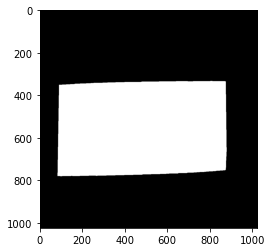

In [10]:
folders = ['train-1-5',
 'train-1-2',
 'train-1-14',
 'train-1-13',
 'train-1-3',
 'train-1-4',
 'train-1-12',
 'train-1-15',
 'train-2-5',
 'train-2-2',
 'train-2-3',
 'train-2-4',
 'train-1-10',
 'train-1-8',
 'train-1-1',
 'train-1-6',
 'train-1-11',
 'train-1-7',
 'train-1-0',
 'train-1-9',
 'train-2-8',
 'train-2-1',
 'train-2-6',
 'train-2-7',
 'train-2-0',
 'train-2-9']
for fname in folders:
    for i in range(7):
        do_it_for_a_folder(i, fname)
        